In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

In [16]:
# Load the Housing.csv data into a DataFrame
housing_data = pd.read_csv('Housing.csv')

# Display the first few rows of the dataset
housing_data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [5]:
# Check for missing values
Missing_Values= housing_data.isnull().sum()

# Check data types
Data_Types= housing_data.dtypes

# Check unique values in each column
Unique_Values=housing_data.nunique()
data_quality = pd.DataFrame({'Missing_Values':Missing_Values, 'Data_Types':Data_Types, 'Unique_Values':Unique_Values})
print(data_quality)

                  Missing_Values Data_Types  Unique_Values
price                          0      int64            219
area                           0      int64            284
bedrooms                       0      int64              6
bathrooms                      0      int64              4
stories                        0      int64              4
mainroad                       0     object              2
guestroom                      0     object              2
basement                       0     object              2
hotwaterheating                0     object              2
airconditioning                0     object              2
parking                        0      int64              4
prefarea                       0     object              2
furnishingstatus               0     object              3


In [6]:
# Check statistics for all columns
statistics = housing_data.describe(include='all')
print(statistics)

               price          area    bedrooms   bathrooms     stories  \
count   5.450000e+02    545.000000  545.000000  545.000000  545.000000   
unique           NaN           NaN         NaN         NaN         NaN   
top              NaN           NaN         NaN         NaN         NaN   
freq             NaN           NaN         NaN         NaN         NaN   
mean    4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std     1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min     1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%     3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%     4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%     5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max     1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

       mainroad guestroom basement hotwaterheating airconditioning  \
count       545       545      545       

In [31]:
object_columns = housing_data.select_dtypes(include=['object']).columns
print(object_columns)
# Get all column names
all_columns = housing_data.columns.tolist()
print(all_columns)

Index([], dtype='object')
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [9]:
object_data_types = data_quality[data_quality['Data_Types'] == 'object']
print(object_data_types)

                  Missing_Values Data_Types  Unique_Values
mainroad                       0     object              2
guestroom                      0     object              2
basement                       0     object              2
hotwaterheating                0     object              2
airconditioning                0     object              2
prefarea                       0     object              2
furnishingstatus               0     object              3


In [14]:
int_columns = Data_Types[Data_Types == 'int64'].index.tolist()
print(int_columns)
object_columns = housing_data.select_dtypes(include=['int64']).columns
print(object_columns)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')


In [21]:
label_encoder = LabelEncoder()

for column in object_data_types.index:
    housing_data[column] = label_encoder.fit_transform(housing_data[column])

housing_data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,2


Intercept: 2012744.6601941711
Slope: 928788.1189320398
Predicted score for 5 bedrooms: 6656685.25485437


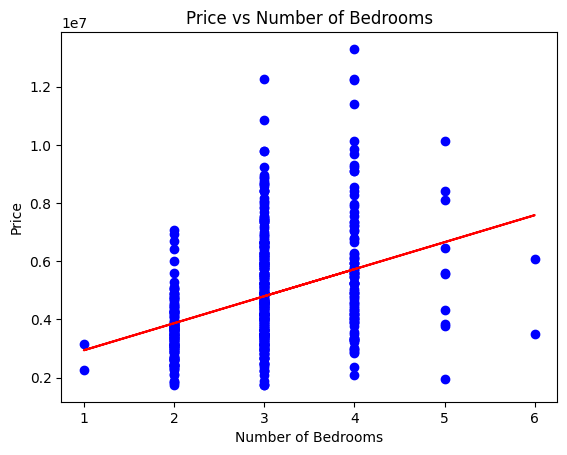

In [28]:
x = housing_data['bedrooms'].values.reshape(-1,1)
y = housing_data['price'].values
model = LinearRegression()
model.fit(x, y) # Train the model

print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")
# Take user input for the number of bedrooms
num_bedrooms = int(input("Enter the number of bedrooms: "))
pred_score = model.predict([[num_bedrooms]])  # Make predictions based on user input
print(f"Predicted score for {num_bedrooms} bedrooms: {pred_score[0]}")

plt.scatter(x, y, color='blue')
plt.plot(x, model.predict(x), color='red')
plt.title('Price vs Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

Intercept: 293083.0691506723
Slope/Coefficients: [ 2.35848772e+02  7.85744924e+04  1.09711727e+06  4.06223164e+05
  3.66824192e+05  2.33146766e+05  3.93159779e+05  6.87881311e+05
  7.85550579e+05  2.25756514e+05  6.29901661e+05 -2.10397118e+05]
Predicted price: 11259145.907542322


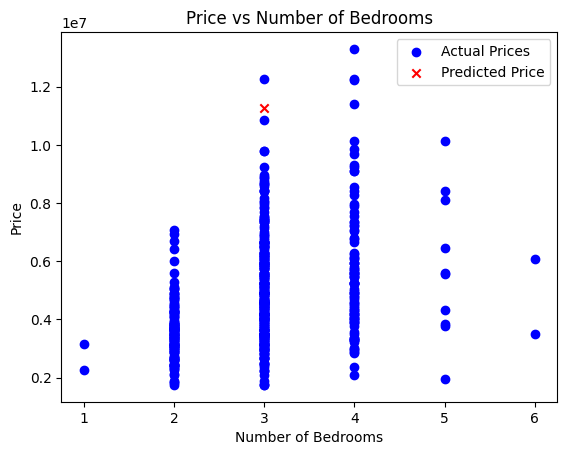

In [ ]:
X = housing_data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']].values  # Multiple features
y = housing_data['price'].values  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Streamlit UI
st.title("House Price Prediction App")
st.write("Enter house details to predict the price.")

# Display model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Slope/Coefficients: {model.coef_}")

# Take user input for multiple features
area = float(input("Enter the area (sq ft): "))
bedrooms = int(input("Enter the number of bedrooms: "))
bathrooms = int(input("Enter the number of bathrooms: "))
stories = int(input("Enter the number of stories: "))
mainroad = int(input("Is it on the main road? (1 for Yes, 0 for No): "))
guestroom = int(input("Does it have a guestroom? (1 for Yes, 0 for No): "))
basement = int(input("Does it have a basement? (1 for Yes, 0 for No): "))
hotwaterheating = int(input("Does it have hot water heating? (1 for Yes, 0 for No): "))
airconditioning = int(input("Does it have air conditioning? (1 for Yes, 0 for No): "))
parking = int(input("Number of parking spaces: "))
prefarea = int(input("Is it in a preferred area? (1 for Yes, 0 for No): "))
furnishingstatus = int(input("Furnishing status (2: Unfurnished, 1: Semi-furnished, 0: Furnished): "))

# Make prediction
user_input = np.array([[area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]])
pred_price = model.predict(user_input)
print(f"Predicted price: {pred_price[0]}")

# Visualizing (only possible for one variable at a time, e.g., bedrooms vs price)
plt.scatter(housing_data['bedrooms'], housing_data['price'], color='blue', label='Actual Prices')
plt.scatter(bedrooms, pred_price, color='red', marker='x', label='Predicted Price')
plt.xlabel('Residential Area')
plt.ylabel('Price')
plt.title('Price vs Residential Area')
plt.legend()
plt.show()
